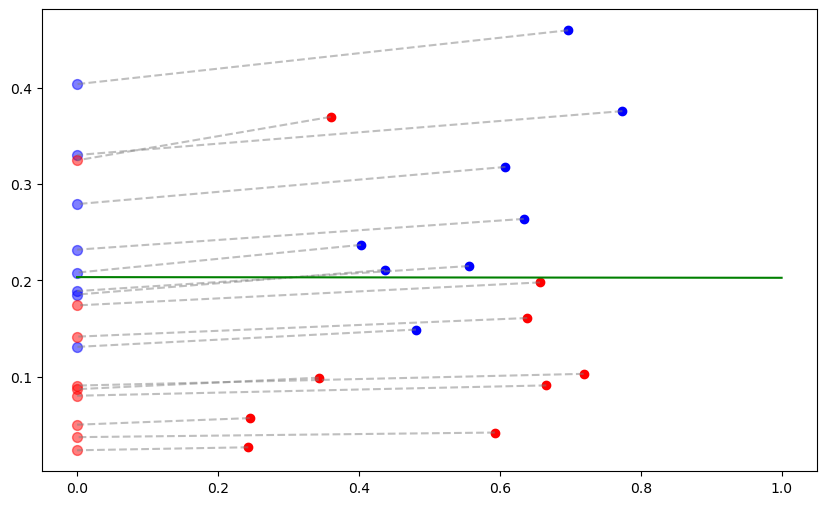

In [19]:
import numpy as np  # for matrix calculation
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

class LDA:
    def __init__(self):
        self.w = None
        self.threshold = None
        self.slope_perpendicular = None
        self.intercept_perpendicular = None
        """
        线性判别分析(以二特征二分类为例)
        
        参数:
        - None
        """
    def fit(self,X,y):
        """
        训练模型
        
        参数:
        - X: 特征矩阵 (n_samples, n_features)
        - y: 标签向量 (n_samples,)
        """
        # 计算均值
        mean_0 = np.mean(X[y==0],axis=0)
        mean_1 = np.mean(X[y==1],axis=0)

        # 计算类内散度矩阵(公式3.33)
        Sw = np.zeros((2,2))
        for i in range(len(X)):
            if y[i] == 0:
                Sw += (X[i]-mean_0).reshape(2,1)@(X[i]-mean_0).reshape(1,2)
            else:
                Sw += (X[i]-mean_1).reshape(2,1)@(X[i]-mean_1).reshape(1,2)
        
        # 计算投影方向(公式3.38)
        self.w = np.linalg.inv(Sw) @ (mean_1 - mean_0)

        # 计算决策边界
        mid_point = (mean_0 + mean_1) / 2
        slope = self.w[1] / self.w[0]

        # 计算垂直于投影向量的斜率
        self.slope_perpendicular = -1 / slope

        # 计算截距
        self.intercept_perpendicular = mid_point[1] - self.slope_perpendicular * mid_point[0]


        # 计算阈值
        self.threshold = self.w.T @ ((mean_0 + mean_1) / 2)

        return self
    
    def predict(self,X):
        """返回预测值"""
        projections = X @ self.w
        return (projections > self.threshold).astype(int)
    
    def score(self,X,y):
        """返回准确率"""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def plot_projection(self,X,y):
        """可视化"""
        # 绘制数据点
        plt.figure(figsize=(10, 6))
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='正例')
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='反例')

        # 计算每个数据点在投影方向上的投影点
        X_projected = X.dot(self.w)

        # 创建一个用于投影的二维数组
        w_prime_2d = np.array([self.w[0], self.w[1]])
        X_projected_points = X_projected[:, np.newaxis] * w_prime_2d

        # 绘制投影点
        plt.scatter(X_projected_points[y == 1][:, 0], X_projected_points[y == 1][:, 1], color='blue', s=50, alpha=0.5, label='正例投影')
        plt.scatter(X_projected_points[y == 0][:, 0], X_projected_points[y == 0][:, 1], color='red', s=50, alpha=0.5, label='反例投影')

        # 绘制从数据点到投影点的线段
        for i in range(len(X)):
            plt.plot([X[i][0], X_projected_points[i][0]], [X[i][1], X_projected_points[i][1]], color='gray', linestyle='--', alpha=0.5)

        # 绘制LDA分割线
        x_values = np.linspace(0, 1, 100)  # x值
        y_values = self.slope_perpendicular * x_values + self.intercept_perpendicular  # 对应的y值
        plt.plot(x_values, y_values, c='g', label='LDA 分割线')

    # 绘制决策边界

if __name__ == '__main__':
    dataset = np.loadtxt('../Data/watermelon_3a.csv',delimiter=',')
    X = dataset[:,1:3]
    y = dataset[:,3]

    # 训练模型
    lda = LDA()
    lda.fit(X, y)

    # 可视化
    lda.plot_projection(X, y)
    plt.show()




